<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/MovingMass_forceEnergy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Moving Mass</h1></b>

Dr. Bingsen Wang

3/15/2025
</center>

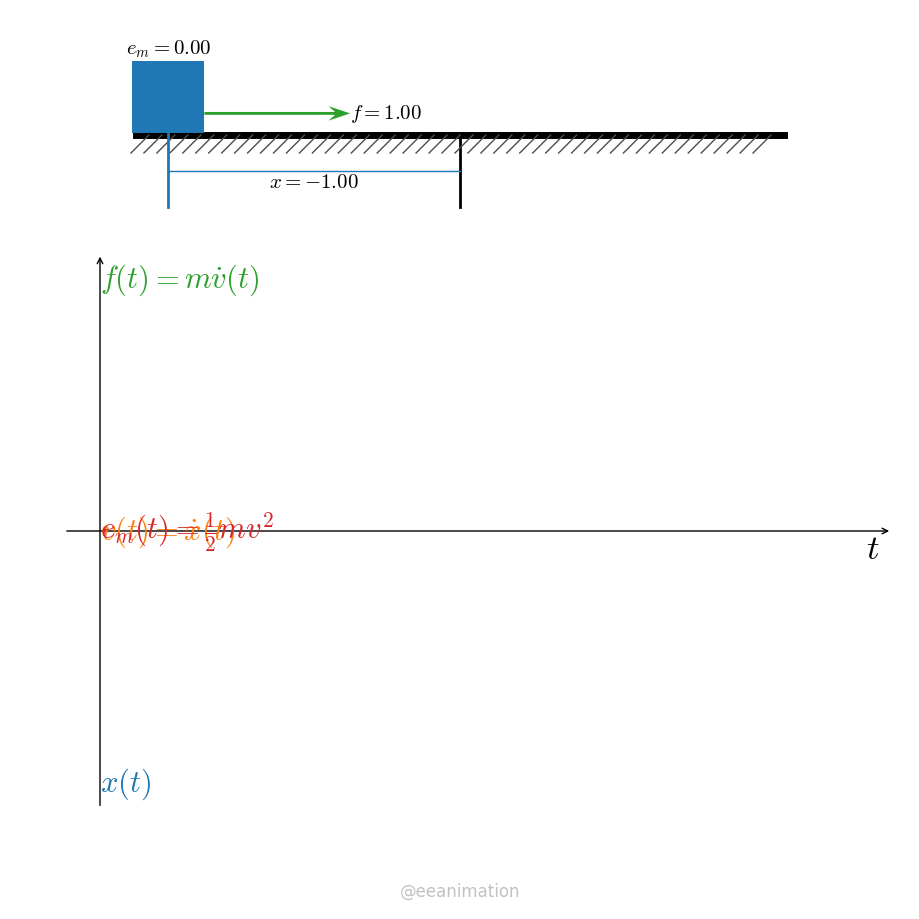

In [5]:
from matplotlib import pyplot,patches,cm,animation
import numpy as np
pyplot.rcParams.update({'font.family':"sans serif",'mathtext.fontset':'cm'})

def clear(ax):
  xlim,ylim = ax.get_xlim(),ax.get_ylim()
  ax.cla()
  ax.set_xlim(xlim); ax.set_ylim(ylim); ax.axis('off')
  return

Nf = 600 #number of animation frames
t = np.linspace(0,2*np.pi,Nf) #time series
xy = [0,.9]; xy1 = [-1,-.2] #origins of the moving mass and the plots
lx = 2; ly = .7 #waveform size
w,n = 1.8,50; dw = w/n
M = 1 #mass
ks  =  w/2*.9 #scaling factor to fit the plot
dx = -ks*np.cos(t) #displacement
v = ks*np.sin(t) #velocity
f = ks*np.cos(t) #force
e = ks*M/2*np.sin(t)**2 #kinetic energy
wrec = .2 #width and height of the moving mass

cl  =  list(cm.tab10.colors) #color list
fig  =  pyplot.figure(figsize = ([9,9]))
ax =  fig.add_axes([0,0,1,1],xlim = [-1.25,1.25],ylim = [-1.25,1.25]); ax.axis('off')
ax1 =  fig.add_axes([0,0,1,1],xlim = [-1.25,1.25],ylim = [-1.25,1.25],fc = 'none'); ax1.axis('off')
[ax.plot([xy[0]-w/2*(1-k),xy[0]+w/2*(1-k)],[xy[1],xy[1]-k*.2],lw = 5-3*k,c = 'k') for k in range(2)]
[ax.plot([xy[0]-w/2+k*dw,xy[0]-w/2+k*dw-.05],[xy[1],xy[1]-.05],c = '.3',lw = 1) for k in range(1,n)]
ax.annotate('',(xy1[0]+lx*1.1,xy1[1]),(xy1[0]-.1,xy1[1]),arrowprops = {'arrowstyle':'->', 'color':'k', 'lw':1})
ax.annotate('',(xy1[0],xy1[1]+ly*1.1),(xy1[0],xy1[1]-ly*1.1),arrowprops = {'arrowstyle':'->', 'color':'k', 'lw':1})
ax.text(xy1[0]+lx*1.1,xy1[1],'$t$  ',ha = 'right',va = 'top',size = 25)
lines = [ax.plot([],[],c = cl[0],lw = 2-k)[0] for k in range(2)]
lines += [ax.plot([],[],c = cl[k],lw = 3)[0] for k in range(4)]
tx1 = [ax.text(0,0,'',size = 15,va = ['top','center','center','bottom'][k],ha = ['center','center','center','center'][k]) for k in range(4)]
tx2 = [ax.text(0,0,[r'$x(t)$',r'$v(t) = \dot x(t)$',r'$f(t) = m\dot v(t)$',r'$e_m(t) = \frac{1}{2}mv^2$'][k],
             c = cl[k],size = 22,va = 'center') for k in range(4)]

def animate(i):
  vt,ft = v[i]*.5,f[i]*.5
  dir = [np.sign(vt),np.sign(ft)]
  xt = xy[0]+dx[i]
  lmd = e[i]/ks*2
  crec = lmd*np.array(cl[3])+(1-lmd)*np.array(cl[0]) #blended color of the rectangle
  clear(ax1)
  ax1.add_patch(patches.Rectangle([xt-wrec/2,xy[1]+.005],wrec,wrec,fc = crec,ec = 'none'))
  [ax1.add_patch(patches.FancyArrow(xt+wrec/2*dir[k],xy[1]+.01+wrec/2+.05*(-1)**k,[vt,ft][k],0,width = 0.008,
            head_width = .04,length_includes_head = True,overhang = .3,fc = cl[1+k],lw = 0)) for k in range(2)]
  lines[0].set_data([xt,xt],[xy[1]+.01+wrec/2,xy[1]-.2])
  lines[1].set_data([xy[0],xt],[xy[1]-.1,xy[1]-.1])
  [lines[2+k].set_data(t[:i+1]/(2*np.pi)*lx+xy1[0],[dx,v,f,e][k][:i+1]/ks*ly+xy1[1]) for k in range(4)]
  [tx2[k].set_position([t[i]/(2*np.pi)*lx+xy1[0],[dx,v,f,e][k][i]/ks*ly+xy1[1]]) for k in range(4)]
  tx1[0].set_text(rf'$x = {dx[i]/ks:.2f}$')
  tx1[0].set_position([xt-dx[i]/2,xy[1]-.1])
  tx1[1].set_text(rf'$v = {v[i]/ks:.2f}$')
  tx1[1].set_position([xt+wrec/2*dir[0]+vt,xy[1]+.06+wrec/2])
  tx1[1].set_ha(['center','left','right'][int(dir[0])])
  tx1[2].set_text(rf'$f = {f[i]/ks:.2f}$')
  tx1[2].set_position([xt+wrec/2*dir[1]+ft,xy[1]-.04+wrec/2])
  tx1[2].set_ha(['center','left','right'][int(dir[1])])
  tx1[3].set_text(rf'$e_m = {e[i]/ks:.2f}$')
  tx1[3].set_position([xt,xy[1]+.01+wrec])
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size = 12,c = '.2',alpha = .3,ha = 'center',va = 'bottom')
anim  =  animation.FuncAnimation(fig, animate, frames = Nf, interval = 50)
anim.save("MovingMassEnergy.mp4",writer = animation.FFMpegWriter(fps = 60),dpi = 200)